#### importation des package

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

on lit les donne que l'ont a recuperer avec le code [database](databasefut.py).

In [2]:
df= pd.read_csv('data.csv')
df.shape

C:\Users\Adame\AppData\Local\Temp\ipykernel_5832\2422472068.py:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('data.csv')


(16155, 82)

on affiche les donne de [data](data.csv).

In [3]:
df.head()

,id1,id,sofifa_id,nom,poste,general,potentiel,age,taille,poid,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0,0,158023,Lionel Andrés Messi Cuccittini,CF,93,95,27,169,67,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3
1,1,1,20801,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,29,185,80,...,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3
2,2,2,9014,Arjen Robben,"RM, LM, RW",90,90,30,180,80,...,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3
3,3,3,41236,Zlatan Ibrahimović,ST,90,90,32,195,95,...,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3
4,4,4,167495,Manuel Peter Neuer,GK,90,90,28,193,92,...,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3


ici on affiche les donne du tableau

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id1                          16155 non-null  int64  
 1   id                           16155 non-null  int64  
 2   sofifa_id                    16155 non-null  int64  
 3   nom                          16155 non-null  object 
 4   poste                        16155 non-null  object 
 5   general                      16155 non-null  int64  
 6   potentiel                    16155 non-null  int64  
 7   age                          16155 non-null  int64  
 8   taille                       16155 non-null  int64  
 9   poid                         16155 non-null  int64  
 10  club                         15916 non-null  object 
 11  league                       15916 non-null  object 
 12  nationalité                  16155 non-null  object 
 13  pied prefere    

### <font color = gold><strong> description des donnee </strong></font>
Les statistiques descriptives incluent celles qui résument la tendance centrale, la dispersion et la forme de la distribution d'un ensemble de données, à l'exclusion NaNdes valeurs.                         
<font color = blue><strong> percentiles</strong></font> sert a donnee les instruction en pourcentage

In [5]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,id1,id,sofifa_id,general,potentiel,age,taille,poid,pace,shooting,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,14380.000000,14380.000000,...,0.0,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,1775.000000
mean,8077.000000,8077.000000,189298.540699,63.830393,68.350108,24.776230,181.083627,75.474342,68.049026,51.582337,...,NaN,45.009037,47.656639,45.885918,15.869514,15.511668,15.354875,15.504735,15.998514,43.865915
std,4663.691135,4663.691135,39762.547872,7.169896,6.580610,4.625321,6.618974,6.891796,10.965779,13.401158,...,NaN,17.915206,18.743105,18.145497,17.576799,16.414173,16.010498,16.585081,17.983209,8.484421
min,0.000000,0.000000,2.000000,40.000000,40.000000,16.000000,155.000000,50.000000,22.000000,22.000000,...,NaN,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000
10%,1615.400000,1615.400000,148185.600000,55.000000,60.000000,19.000000,172.000000,67.000000,54.000000,32.000000,...,NaN,25.000000,25.000000,25.000000,6.000000,6.000000,6.000000,6.000000,6.000000,32.000000
25%,4038.500000,4038.500000,178042.500000,59.000000,64.000000,21.000000,176.000000,70.000000,62.000000,41.000000,...,NaN,25.000000,25.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,39.000000
50%,8077.000000,8077.000000,200844.000000,64.000000,68.000000,24.000000,181.000000,75.000000,69.000000,53.000000,...,NaN,46.000000,52.000000,49.000000,11.000000,11.000000,11.000000,10.000000,10.000000,44.000000
75%,12115.500000,12115.500000,214349.500000,68.000000,73.000000,28.000000,186.000000,80.000000,75.000000,62.000000,...,NaN,61.000000,64.000000,62.000000,13.000000,14.000000,13.000000,13.000000,13.000000,49.000000
90%,14538.600000,14538.600000,222643.600000,73.000000,77.000000,31.000000,190.000000,85.000000,81.000000,68.000000,...,NaN,68.000000,71.000000,68.000000,54.000000,49.000000,49.000000,49.000000,55.000000,55.000000
max,16154.000000,16154.000000,254664.000000,93.000000,95.000000,44.000000,204.000000,110.000000,97.000000,93.000000,...,NaN,90.000000,91.000000,95.000000,88.000000,87.000000,92.000000,90.000000,90.000000,66.000000


### <font color = gold><strong> colonne </strong></font>

 colonne de base


In [6]:
df.columns

Index(['id1', 'id', 'sofifa_id', 'nom', 'poste', 'general', 'potentiel', 'age',
       'taille', 'poid', 'club', 'league', 'nationalité', 'pied prefere',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeepi

### <font color = gold><strong> grafique frequence</strong></font>

estimation de la frequence du gen des joueur
```

Un histogramme est une représentation de la distribution des données. Cette fonction regroupe les valeurs de toutes les séries données dans le DataFrame en bacs et dessine tous les bacs en un seul matplotlib.axes.Axes.

```

<AxesSubplot: ylabel='Frequency'>

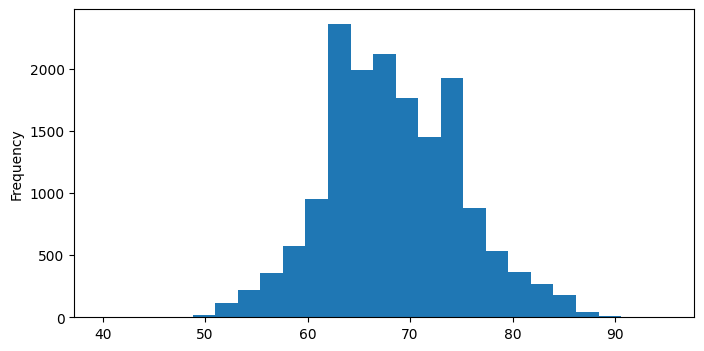

In [7]:
df['potentiel'].plot.hist(bins=25,figsize=(8,4))

### <font color = gold><strong> correlation</strong></font>

on affiche la correlation du tableau.

```

Lorsqu'il existe une corrélation entre deux variables, cela signifie simplement qu'il existe une relation entre ces deux variables. Cette relation peut être : positive : lorsque les deux variables bougent dans la même direction ou ; négative : lorsque les deux variables bougent dans une direction opposée.

```

In [8]:
df.corr()

C:\Users\Adame\AppData\Local\Temp\ipykernel_5832\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id1,id,sofifa_id,general,potentiel,age,taille,poid,pace,shooting,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
id1,1.000000,1.000000,0.414395,-0.975410,-0.761193,-0.467535,-0.048176,-0.124719,-0.220813,-0.493899,...,NaN,-0.215367,-0.223091,-0.192207,0.009362,0.003237,0.008399,-0.001786,0.009562,-0.148274
id,1.000000,1.000000,0.414395,-0.975410,-0.761193,-0.467535,-0.048176,-0.124719,-0.220813,-0.493899,...,NaN,-0.215367,-0.223091,-0.192207,0.009362,0.003237,0.008399,-0.001786,0.009562,-0.148274
sofifa_id,0.414395,0.414395,1.000000,-0.388591,-0.076725,-0.697844,-0.095122,-0.164777,0.166849,-0.216579,...,NaN,-0.120076,-0.114059,-0.093690,-0.070883,-0.078074,-0.072205,-0.081448,-0.070001,0.052097
general,-0.975410,-0.975410,-0.388591,1.000000,0.803952,0.436976,0.050819,0.123992,0.233806,0.505029,...,NaN,0.212861,0.222285,0.192599,-0.006846,-0.001172,-0.006270,0.003398,-0.007090,0.165657
potentiel,-0.761193,-0.761193,-0.076725,0.803952,1.000000,-0.072417,0.014917,0.015527,0.326661,0.423273,...,NaN,0.119906,0.137690,0.118230,-0.035506,-0.033718,-0.037169,-0.032625,-0.034995,0.195243
age,-0.467535,-0.467535,-0.697844,0.436976,-0.072417,1.000000,0.085429,0.211942,-0.203056,0.205109,...,NaN,0.158064,0.145385,0.122019,0.092458,0.101170,0.095343,0.107999,0.090986,-0.077087
taille,-0.048176,-0.048176,-0.095122,0.050819,0.014917,0.085429,1.000000,0.766291,-0.391897,-0.170879,...,NaN,0.037352,0.018252,0.003512,0.348764,0.346815,0.343080,0.346524,0.345892,-0.093228
poid,-0.124719,-0.124719,-0.164777,0.123992,0.015527,0.211942,0.766291,1.000000,-0.352578,-0.091271,...,NaN,0.030988,0.012957,-0.004027,0.337191,0.335765,0.332982,0.336338,0.333946,-0.113918
pace,-0.220813,-0.220813,0.166849,0.233806,0.326661,-0.203056,-0.391897,-0.352578,1.000000,0.352333,...,NaN,-0.257998,-0.256327,-0.234884,-0.007891,0.006051,0.010627,-0.007744,-0.001225,NaN
shooting,-0.493899,-0.493899,-0.216579,0.505029,0.423273,0.205109,-0.170879,-0.091271,0.352333,1.000000,...,NaN,-0.483453,-0.463613,-0.486834,-0.003826,0.006529,0.006522,-0.010470,0.004083,NaN


on enleve les colonne dont-on a pas besoin.

In [9]:
df.drop(['id1', 'id', 'sofifa_id', 'nom', 'poste',  'potentiel', 'age','taille', 'poid', 'club', 'league', 'nationalité', 'pied prefere','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb','lcb', 'cb', 'rcb', 'rb', 'gk'],axis=1, inplace=True)
df.head()

,general,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,...,NaN,25,21,20,6,11,15,14,8,NaN
1,92,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,...,NaN,22,31,23,7,11,15,14,11,NaN
2,90,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,...,NaN,29,26,26,10,8,11,5,15,NaN
3,90,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,...,NaN,25,41,27,13,15,10,9,12,NaN
4,90,NaN,NaN,NaN,NaN,NaN,NaN,25,25,25,...,NaN,25,25,25,87,85,92,90,86,60.0


### <font color = gold><strong> heatmap</strong></font>

affichage de la heatmap

```

Une heatmap, ou carte de chaleur, est une représentation graphique de données. Elle fonctionne sur le principe d'un nuancier de couleurs allant généralement du bleu au rouge. Ce procédé permet de donner à des données un aspect visuel plus facile à comprendre et à interpréter qu'un tableau Excel.

```

<AxesSubplot: >

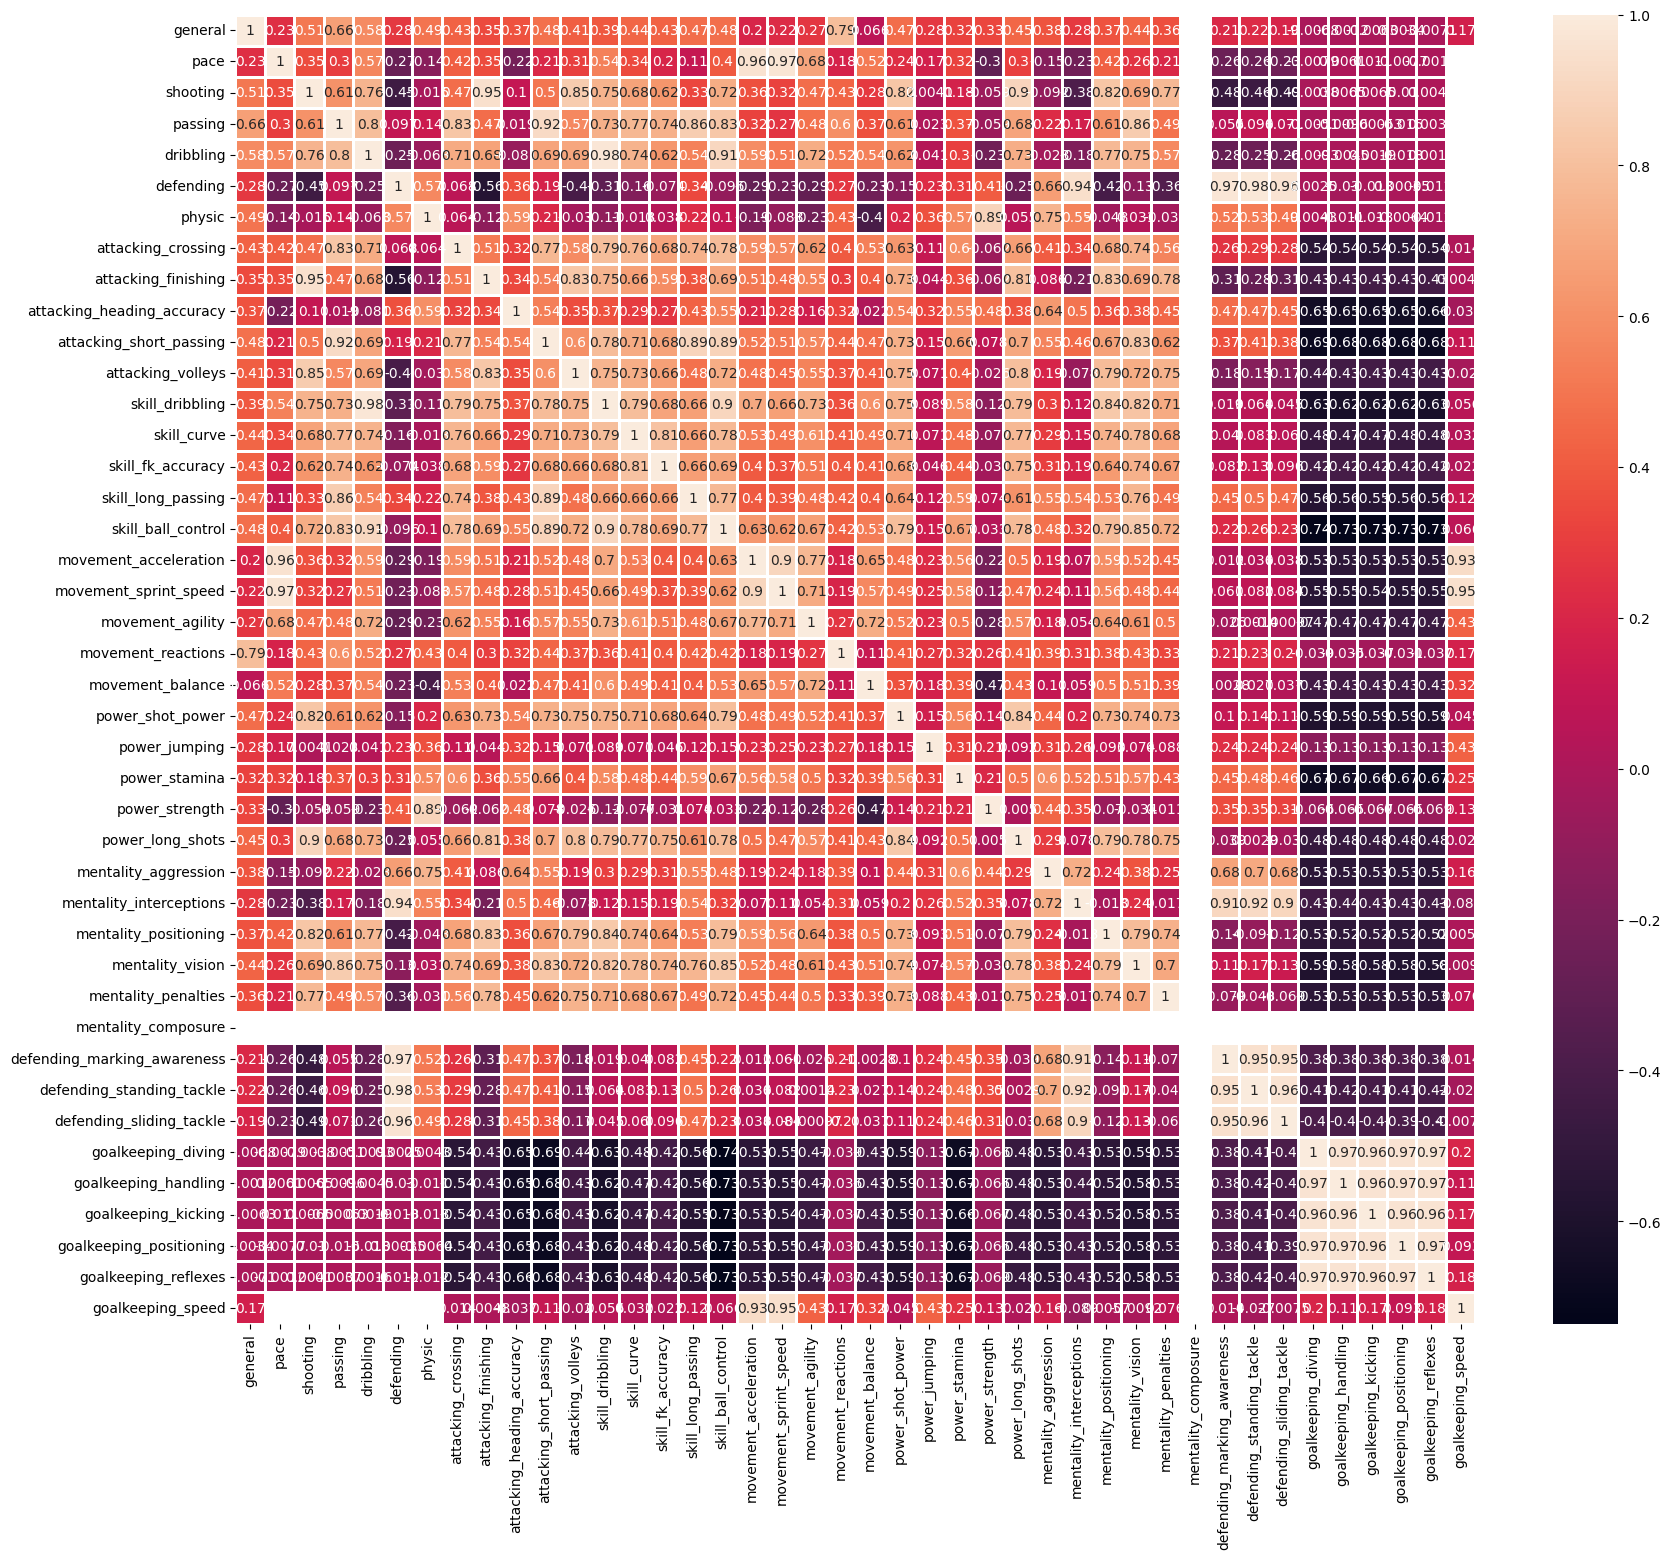

In [10]:
plt.figure(figsize=(20,17))
sns.heatmap(df.corr(),annot=True,linewidths=2)

creation d'un liste avec le nom des colonne 

In [11]:
df.drop(['mentality_composure'],axis=1, inplace=True)
l_column = list(df.columns)
len_feature = len(l_column)  
l_column

['general',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'goalkeeping_speed']

### <font color = gold><strong> Preparation regression lineaire et Lasso</strong></font>

on donne les valeurr de X et y

In [15]:
X = df[l_column[1:len_feature]]
y = df[l_column[len_feature-41]]

print("Taille de l'ensemble des fonctionnalités :",X.shape)
print("Taille de l'ensemble des variables:",y.shape)

Taille de l'ensemble des fonctionnalités : (16155, 40)
Taille de l'ensemble des variables: (16155,)


In [16]:
X.head()

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,...,76,25,21,20,6,11,15,14,8,NaN
1,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,...,85,22,31,23,7,11,15,14,11,NaN
2,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,...,80,29,26,26,10,8,11,5,15,NaN
3,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,...,91,25,41,27,13,15,10,9,12,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,25,25,25,42,...,37,25,25,25,87,85,92,90,86,60.0


In [17]:
y.head()

0    93
1    92
2    90
3    90
4    90
Name: general, dtype: int64

### <font color = gold><strong> X_train y_train</strong></font>

```

Train-Test Split consiste à décomposer de manière aléatoire un ensemble de données. Une partie servira à l'entraînement du modèle de Machine Learning, l'autre partie permettra de le tester pour la validation. En général, on réserve 70% à 80% des données du dataset pour l'entraînement.

```

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11308, 40)
(4847, 40)
(11308,)
(4847,)


### <font color = gold><strong> Regression lineaire </strong></font>

```

La régression linéaire est une technique statistique de modélisation des relations entre différentes variables dépendantes et indépendantes. Utilisée pour décrire et analyser les valeurs ou données, la régression linéaire a pour objectif de réaliser des prédictions ou des prévisions.

```

In [19]:
lr= LinearRegression()
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


on remplit le modèle avec des données d'entrainement. 
```

Pour un apprentissage supervisé, la méthode accepte 2 arguments: les données X et les labels y .
Pour une apprentissage non supervisé, la méthode ne prend qu'un seul arguement, les données X  .

```


In [20]:
lr.fit(X_train,y_train)

LinearRegression()

<font color = gold><strong>intercept_</strong></font> :  permet de calculer le paramètre β0


In [21]:
lr.intercept_

4.1844233533603585

<font color = gold><strong>coef_</strong></font> : permet de calculer le paramètre β

In [22]:
lr.coef_

array([-0.04950175, -0.06870792,  0.09013104,  0.10485175,  0.02724756,
        0.03728402, -0.00552261,  0.07757605,  0.11607484,  0.02421894,
        0.01091465, -0.06109678,  0.0169854 ,  0.00555755, -0.01581051,
        0.18106045,  0.03392861,  0.07798767,  0.01128781,  0.25646793,
       -0.0171607 ,  0.04372379,  0.01180856, -0.01233935,  0.04059985,
       -0.01454869,  0.00199632,  0.00359364, -0.04127013, -0.01899841,
        0.01938154,  0.02764917,  0.0307029 , -0.0297771 ,  0.10238041,
        0.11399221,  0.05965699,  0.1197088 ,  0.09829901, -0.09811536])

In [23]:
cdf = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
pace,-0.049502
shooting,-0.068708
passing,0.090131
dribbling,0.104852
defending,0.027248
physic,0.037284
attacking_crossing,-0.005523
attacking_finishing,0.077576
attacking_heading_accuracy,0.116075
attacking_short_passing,0.024219


on compare le general avec les caracteristique


Text(0.5, 1.0, 'physic vs. general')

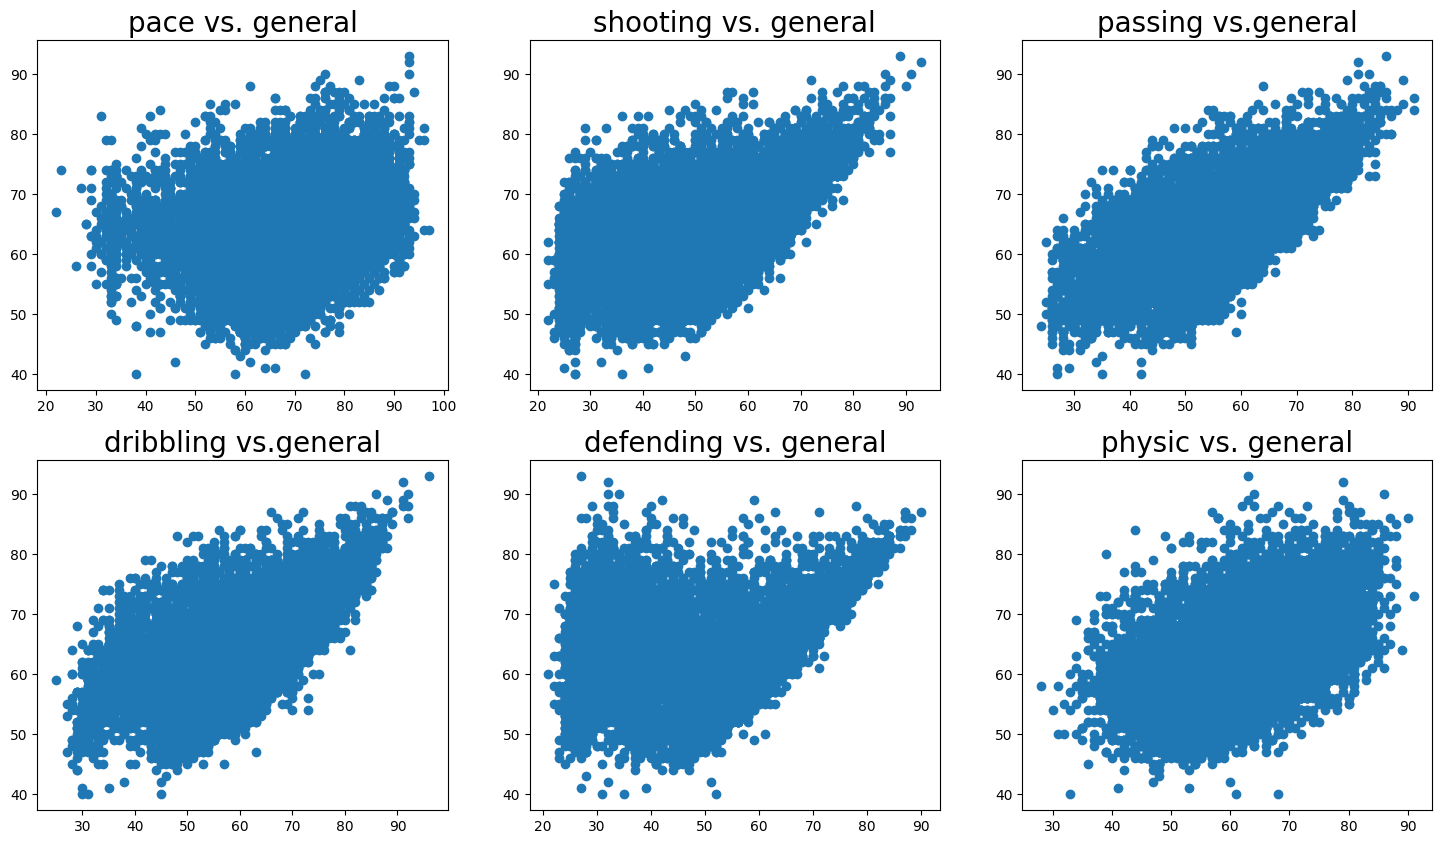

In [24]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
 
ax0 = plt.subplot(gs[0])
ax0.scatter(df[l[0]],df['general'])
ax0.set_title(l[0]+" vs. general", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['general'])
ax1.set_title(l[1]+" vs. general",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['general'])
ax2.set_title(l[2]+" vs.general",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['general'])
ax3.set_title(l[3]+" vs.general",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(df[l[4]],df['general'])
ax4.set_title(l[4]+" vs. general",fontdict={'fontsize':20})

ax5 = plt.subplot(gs[5])
ax5.scatter(df[l[5]],df['general'])
ax5.set_title(l[5]+" vs. general",fontdict={'fontsize':20})



prediction du gen des joueur selon <font color = blue><strong>X</strong></font>

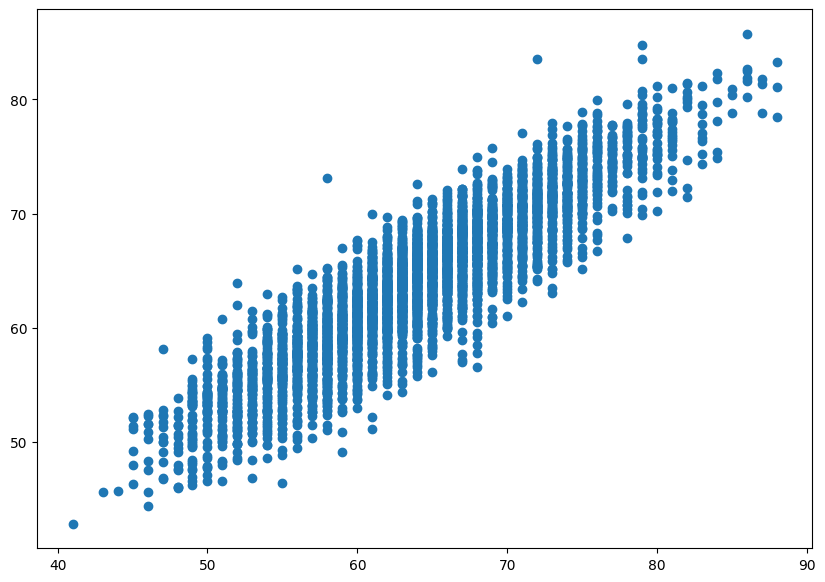

In [25]:
X_test=X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
predictions=lr.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=predictions)

C:\Users\Adame\AppData\Local\Temp\ipykernel_5832\3613218232.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<AxesSubplot: title={'center': 'Histogramme des résidus pour vérifier la normalité'}, xlabel='Residus', ylabel='Kernel density'>

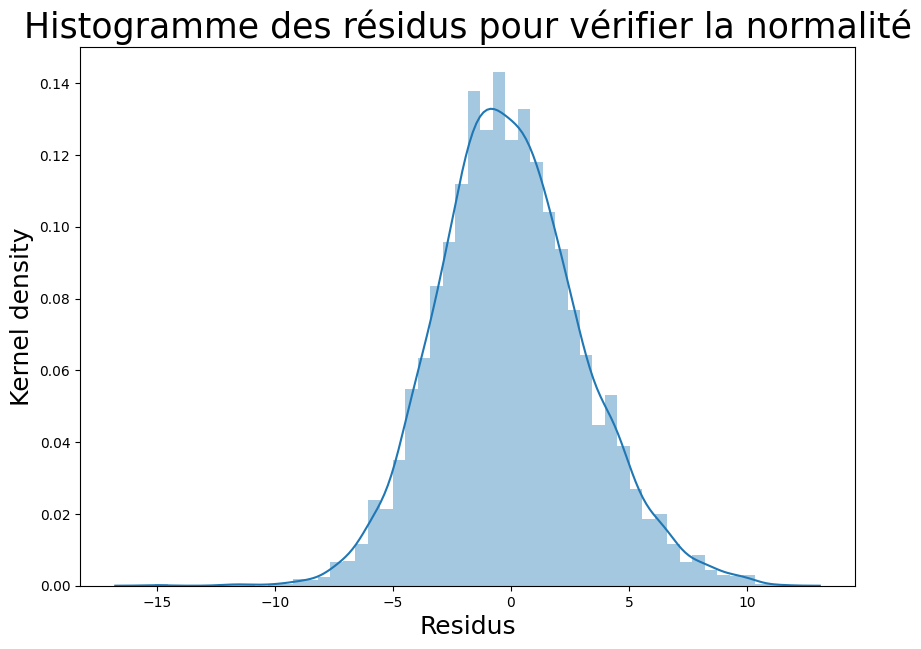

In [26]:
plt.figure(figsize=(10,7))
plt.title("Histogramme des résidus pour vérifier la normalité",fontsize=25)
plt.xlabel("Residus",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

### <font color = gold><strong>Regression Lasso</strong></font>

```

C'est une régression linéaire avec une contrainte linéaire sur les coefficients. C'est utile lorsque les variables sont très corrélées, ce qui fausse souvent la résolution numérique. La solution ne s'exprime de façon exacte et la résolution utilise une méthode à base de gradient.

```

##### <font color = gold><strong> Premiere methode regression Lasso</strong></font>

In [27]:
train_pred=lr.predict(X_train)
round(metrics.r2_score(y_train,train_pred),3)

0.817

##### <font color = gold><strong>Deuxieme methode regression Lasso</strong></font>

In [28]:


# Initialisation du modèle de régression Lasso
model = Lasso(alpha=0.1)

# Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Evaluation du modèle sur les données de test
score = model.score(X_test, y_test)
print(f"Score du modèle : {score:.2f}")

Score du modèle : 0.81


C:\Users\Adame\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.206e+02, tolerance: 5.835e+01
  model = cd_fast.enet_coordinate_descent(


<font color = gold><strong>coef_</strong></font> : pour Lasso


In [29]:
model.coef_


array([ 0.04095401,  0.        ,  0.04401742,  0.        ,  0.05291098,
        0.04030471,  0.00157391,  0.04399239,  0.11451647,  0.03404049,
        0.00625107, -0.00276196,  0.01818603,  0.0069944 , -0.00356873,
        0.20671406, -0.00052045,  0.02343994,  0.0184584 ,  0.26225259,
       -0.0121392 ,  0.02988579,  0.01118246, -0.01125085,  0.03949258,
       -0.02553138,  0.00072018, -0.        , -0.04232428, -0.00697934,
        0.01595827,  0.01756324,  0.01463432, -0.02316915,  0.0957097 ,
        0.108978  ,  0.05314084,  0.11553702,  0.09119783, -0.01275976])

In [31]:
cdf = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
pace,0.040954
shooting,0.000000
passing,0.044017
dribbling,0.000000
defending,0.052911
physic,0.040305
attacking_crossing,0.001574
attacking_finishing,0.043992
attacking_heading_accuracy,0.114516
attacking_short_passing,0.034040


<font color = gold><strong>intercept_</strong></font> : pour Lasso

In [32]:
model.intercept_

4.541156068902076